<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from google.colab import drive  

import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import itertools


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_EDA.csv")

In [5]:
airline.shape

(787, 21)

In [6]:
airline.sample(5)

,Unnamed: 0,Unnamed: 0.1.1,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
338,338,304,1335849819366166529,2020-12-07 07:33:10,"['wishing', 'happy', 'international', 'civil',...",0,False,"Doha, Qatar",en,Qatar airways,wishing happy international civil aviation som...,0.500000,0.400000,Positive,0,0,1,0,0,0,0
516,516,433,1334930567989784579,2020-12-04 18:40:23,"['lieflat', 'free', 'fizz', 'posh', 'generous'...",1,False,NaN,en,British airways,lieflat free fizz posh generous coffee service...,0.266667,0.133333,Positive,0,0,0,0,1,1,0
711,711,277,1334106555642503169,2020-12-02 12:06:04,"['worth', 'paying', 'extra', 'business', 'clas...",0,False,"London, England",en,Air France,worth paying extra business class france find ...,0.100000,0.150000,Positive,0,0,0,0,0,0,0
600,600,136,1336072246645968908,2020-12-07 22:17:01,"['video', 'series', 'americanairlines', 'featu...",0,False,Worldwide,en,American airlines,video series americanairlines featuring flight...,0.400000,0.200000,Positive,0,0,1,0,0,0,0
359,359,397,1335539485644230657,2020-12-06 11:00:01,"['terrible', 'track', 'record', 'catching', 'f...",78,False,"Doha, Qatar",en,Qatar airways,terrible track record catching flight hopefull...,0.950000,-0.200000,Negative,0,0,1,0,0,0,0


In [7]:
airline.columns

Index(['Unnamed: 0', 'Unnamed: 0.1.1', 'tweet_id', 'created_at', 'text',
       'likes', 'retweeted', 'location', 'language', 'airline', 'string_text',
       'subjectivity', 'polarity', 'sentiment', 'cancel', 'staff', 'flight',
       'cost', 'refund', 'customrt service', 'experience'],
      dtype='object')

In [8]:
#a lot of missing value and the locations needs to be cleaned as well
airline = airline.drop(['Unnamed: 0', 'Unnamed: 0.1.1','string_text', 'text', 'location'], axis=1)

In [9]:
airline.sample(5)

,tweet_id,created_at,likes,retweeted,language,airline,subjectivity,polarity,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
559,1333805173030916103,2020-12-01 16:08:28,0,False,en,British airways,1.000,-1.000000,Negative,1,0,1,1,1,0,0
200,1336597626721071105,2020-12-09 09:04:41,3,False,en,Turkish airlines,0.500,0.200000,Positive,0,0,1,0,0,0,0
578,1336609675156975616,2020-12-09 09:52:34,1,False,en,American airlines,0.625,0.500000,Positive,0,0,0,0,0,0,0
175,1334495530840449026,2020-12-03 13:51:42,175,False,en,Virgin Atlantic,0.850,0.250000,Positive,0,0,0,0,0,0,0
72,1334860574509953025,2020-12-04 14:02:16,1,False,en,United Airlines,0.700,0.383333,Positive,0,0,0,0,0,0,0


In [10]:
airline.isna().sum()

tweet_id            0
created_at          0
likes               0
retweeted           0
language            0
airline             0
subjectivity        0
polarity            0
sentiment           0
cancel              0
staff               0
flight              0
cost                0
refund              0
customrt service    0
experience          0
dtype: int64

In [11]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          787 non-null    int64  
 1   created_at        787 non-null    object 
 2   likes             787 non-null    int64  
 3   retweeted         787 non-null    bool   
 4   language          787 non-null    object 
 5   airline           787 non-null    object 
 6   subjectivity      787 non-null    float64
 7   polarity          787 non-null    float64
 8   sentiment         787 non-null    object 
 9   cancel            787 non-null    int64  
 10  staff             787 non-null    int64  
 11  flight            787 non-null    int64  
 12  cost              787 non-null    int64  
 13  refund            787 non-null    int64  
 14  customrt service  787 non-null    int64  
 15  experience        787 non-null    int64  
dtypes: bool(1), float64(2), int64(9), object(4)


In [168]:
airline.describe()

,tweet_id,likes,subjectivity,polarity,cancel,staff,flight,cost,refund,customrt service,experience
count,7.870000e+02,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,1.335635e+18,12.672173,0.547357,0.212746,0.010165,0.026684,0.231258,0.054638,0.055909,0.058450,0.011436
std,1.015809e+15,61.246129,0.266249,0.384728,0.100373,0.161260,0.421905,0.227417,0.229891,0.234741,0.106393
min,1.333677e+18,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.334704e+18,0.000000,0.333333,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.335797e+18,0.000000,0.533333,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.336525e+18,1.000000,0.750000,0.495833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.337167e+18,706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Preproccesing**

#Distribution of the target 

there is imbalance in the distribution, we are going to stratify the data when split it

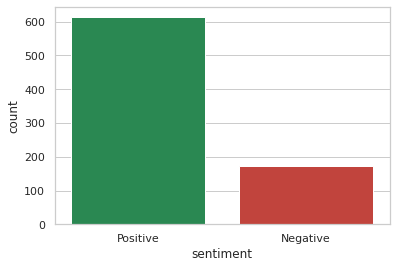

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="sentiment",data=airline, palette= ['#1a9850', '#d73027'])

#Variance

In [170]:
variance = airline.var()
variance = variance.to_frame("variance")
variance["feature_names"] = variance.index 
variance.reset_index(inplace=True)
#reordering columns 
variance = variance[["feature_names","variance"]]
#logging.debug("exporting variance to csv file")
#variance.to_csv(data_file+"_variance.csv", sep="|", index=False)

In [171]:
variance

,feature_names,variance
0,tweet_id,1.031867e+30
1,likes,3.751088e+03
2,retweeted,0.000000e+00
3,subjectivity,7.088837e-02
4,polarity,1.480154e-01
5,cancel,1.007465e-02
6,staff,2.600464e-02
7,flight,1.780039e-01
8,cost,5.171828e-02
9,refund,5.284991e-02


- we are going to remove zero variance(retweeted)
- we are going to remove near zero variance (tweet_id, polarity, cancel, flight, experience)

In [13]:
airline = airline.drop(['retweeted', 'polarity', 'cancel', 'flight', 'experience', 'tweet_id'], axis=1)

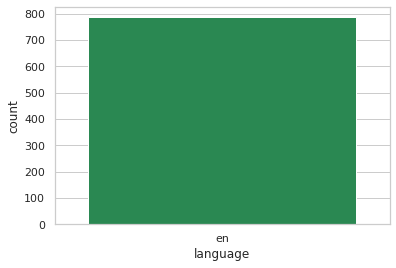

In [173]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="language",data=airline, palette= ['#1a9850', '#d73027'])

In [14]:
#remove language because it contains only one language 
airline = airline.drop(['language'], axis=1)

In [15]:
#remove it for now
airline = airline.drop(['created_at', 'subjectivity'], axis=1)

In [42]:
airline['likes'].unique()

array([  0,   5,   1, 160,   2,   7,   8,  10,  52,   3,  40,  61,  53,
        28,  62,  24,  29,   6,  46,  33, 106,  20,   4,  16,  22,  39,
       124,  34,  59, 175,  11, 185, 110,  21,  19,  66, 706, 534, 588,
       488, 575, 155,  71,  44,  94, 164,  51, 442,  79,  99,  86,  91,
       147,  78, 456, 294, 305,  38,  23, 100,   9,  15,  63, 112,  48,
       385,  14, 431,  13,  35,  12,  47, 130, 248, 165])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Flights')

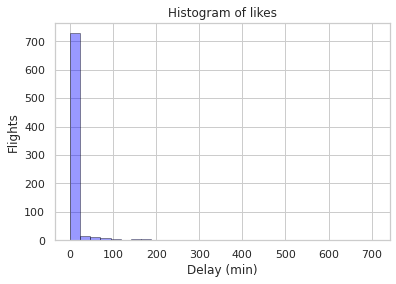

In [98]:
# matplotlib histogram
# I want y to be as the highest number in likes not the number of rows
#plt.hist(airline['likes'], color = 'blue', edgecolor = 'black', bins = 45)

# seaborn histogram
sns.distplot(airline['likes'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'}, bins = 30)
# Add labels
plt.title('Histogram of likes')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

the likes is positively skewed

In [95]:
log_likes = np.log(airline['likes'])
#log_likes.skew()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
likes_sigmoid = sigmoid(airline.likes)
likes_sigmoid.describe()

count    787.000000
mean       0.641606
std        0.197379
min        0.500000
25%        0.500000
50%        0.500000
75%        0.731059
max        1.000000
Name: likes, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Flights')

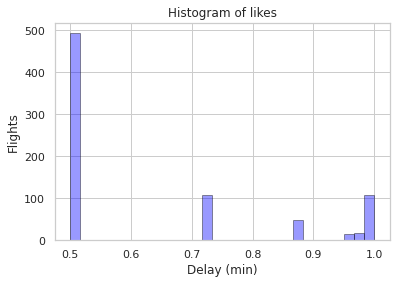

In [100]:
sns.distplot(likes_sigmoid, hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'}, bins = 30)
# Add labels
plt.title('Histogram of likes')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [101]:
likes_log = np.log(airline.likes + 1)
likes_log.describe()

count    787.000000
mean       0.707242
std        1.309784
min        0.000000
25%        0.000000
50%        0.000000
75%        0.693147
max        6.561031
Name: likes, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Flights')

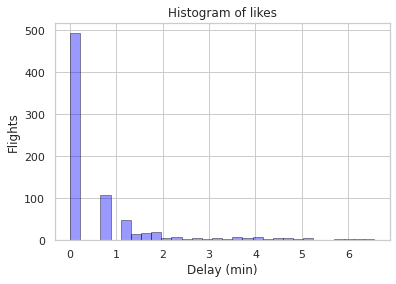

In [102]:
sns.distplot(likes_log, hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'}, bins = 30)
# Add labels
plt.title('Histogram of likes')
plt.xlabel('likes')
plt.ylabel('counts')

In [103]:
likes_log_normalized = normalize(likes_log)
likes_log_normalized.describe()

count    787.000000
mean       0.107794
std        0.199631
min        0.000000
25%        0.000000
50%        0.000000
75%        0.105646
max        1.000000
Name: likes, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'counts')

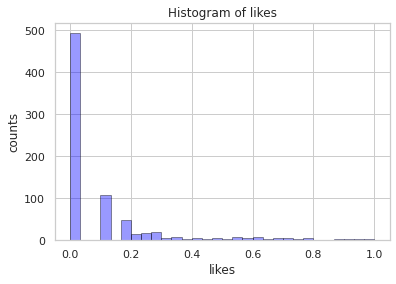

In [104]:
sns.distplot(likes_log_normalized, hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'}, bins = 30)
# Add labels
plt.title('Histogram of likes')
plt.xlabel('likes')
plt.ylabel('counts')

#Assess the distribution of the airlines

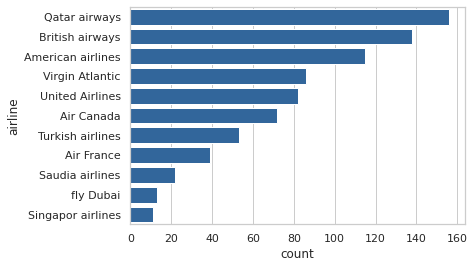

In [176]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=airline, color= '#2166ac', order = airline['airline'].value_counts().index)

#Encoding the variables


- airline
- sentiment (target)

In [16]:
le = LabelEncoder()
airline['airline'] = le.fit_transform(airline['airline'])
airline

,likes,airline,sentiment,staff,cost,refund,customrt service
0,0,5,Positive,0,0,0,0
1,5,5,Positive,0,0,0,0
2,1,5,Positive,0,0,0,0
3,0,5,Positive,0,0,0,0
4,0,5,Positive,1,0,0,0
...,...,...,...,...,...,...,...
782,0,0,Positive,0,0,0,0
783,0,0,Positive,0,1,1,0
784,1,0,Positive,0,0,0,0
785,0,0,Negative,0,0,0,0


#check if there is high correlation

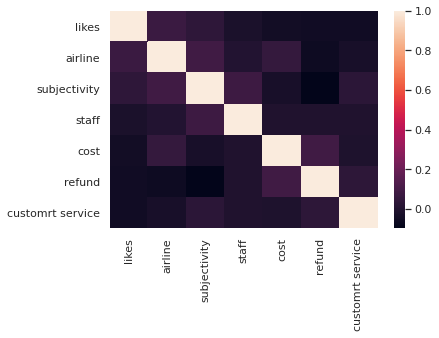

In [17]:
sns.heatmap(airline.corr())
plt.show()

In [33]:
x_data = airline[['likes', 'airline', 'staff', 'cost', 'refund', 'customrt service']]
y_data = airline['sentiment']

In [34]:
# Map response variable to integers 0,1.

y_data = pd.Series(np.where(y_data.values == 'Positive',1,0), y_data.index)

y_data.value_counts()

1    613
0    174
dtype: int64

#Test-Train split

70% train
30# test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, stratify=y_data, random_state=123)


In [36]:
X_train.shape, y_train.shape

((550, 6), (550,))

In [37]:
X_test.shape , y_test.shape

((237, 6), (237,))

In [39]:
y_test

763    1
451    0
530    1
669    1
760    0
      ..
783    1
776    1
394    0
442    1
422    1
Length: 237, dtype: int64

In [45]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Imbalance dataset

#Dealing with imbalance data

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100

**Confusion-Matrix:**
In case of imbalanced classes confusion-matrix is good technique to summarizing the performance of a classification algorithm.


Since, as explained above, accuracy isn’t a good measure when working with imbalanced datasets, let’s consider more appropriate measures.

- Precision: True Positives / All Predicted Positives = TP / (TP+FP). Precision is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.


- Recall: True Positives / All actual positives = TP / (TP + FN). Recall is a measure of a classifier’s completeness. It is also the same as Sensitivity or the True positive rate. Low recall indicates a high number of false negatives.


- F1 score: 2TP/(2TP + FP + FN) A weighted average of precision and recall. If we wanted a balance between precision and recall then we’d look at F1 score.


#Build Model
- Logistic regression
- RandomForestClassifier

In [46]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 497 out of 500 | elapsed:   10.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.5s finished


In [47]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.7805907172995781


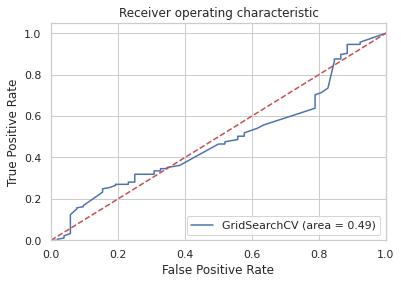

In [49]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [191]:
roc_auc

0.4851351351351352

In [58]:
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
classes = best_clf.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

0.7805907172995781 0.7805907172995781 1.0 1.0 0.8767772511848342 0.7805907172995781 0.4851351351351352


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [51]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.78      0.88       237

    accuracy                           0.78       237
   macro avg       0.50      0.39      0.44       237
weighted avg       1.00      0.78      0.88       237



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


a model that classified all sentiments as positive sentiment would obtain a precision of 100% since it correctly classified all positive and a recall of 0% since it incorrectly classified all negative

#SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class.

In [79]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

best_clf = clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.5s finished


In [80]:
X_train_res.shape, y_train_res.shape

((856, 6), (856,))

In [81]:
best_clf.best_estimator_.get_params()['classifier']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.6244725738396625


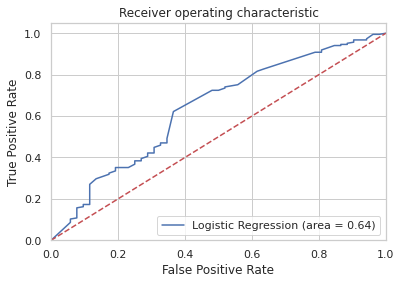

In [83]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [84]:
roc_auc

0.6377338877338876

The AUC score improved to 0.63



In [85]:
classes = best_clf.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

0.6244725738396625 0.5892986523692219 0.6216216216216216 0.6136500188077744 0.7210031347962382 0.8582089552238806 0.6377338877338876


In [86]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.63      0.32      0.43       103
           1       0.62      0.86      0.72       134

    accuracy                           0.62       237
   macro avg       0.63      0.59      0.57       237
weighted avg       0.63      0.62      0.59       237



#Compare the results

In [40]:
df_predictors=pd.DataFrame(X_test) 

In [66]:
df_target = pd.DataFrame(y_test)

In [74]:
df_predict_Logistic = pd.DataFrame(classes, columns=['p_logistic'],index=df_predictors.index.copy())

In [87]:
df_predict_Random = pd.DataFrame(classes, columns=['p_random'],index=df_predictors.index.copy())

In [76]:
df_results = pd.merge(df_predictors, df_target,how = 'left',left_index = True, right_index = True)

In [77]:
df_results = pd.merge(df_results, df_predict_Logistic,how = 'left',left_index = True, right_index = True)

In [88]:
df_results = pd.merge(df_results, df_predict_Random,how = 'left',left_index = True, right_index = True)

In [89]:
df_results

,likes,airline,staff,cost,refund,customrt service,0,p_logistic,p_random
763,165,0,0,0,0,0,1,1,1
451,0,3,0,0,0,0,0,1,0
530,0,3,0,0,1,0,1,1,0
669,0,2,0,1,0,0,1,1,1
760,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
783,0,0,0,1,1,0,1,1,1
776,4,0,0,0,0,0,1,1,0
394,0,4,0,0,0,0,0,1,0
442,0,3,0,0,0,0,1,1,0


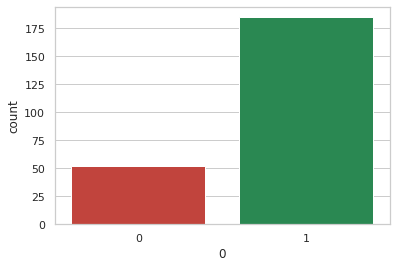

In [93]:
#y_test
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=0,data=df_results, palette= ['#d73027', '#1a9850'])

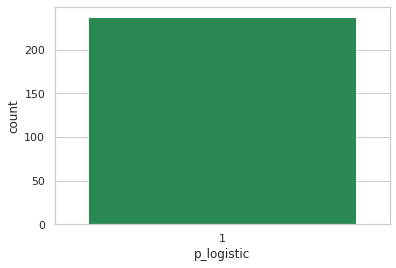

In [91]:
#predict logistic
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='p_logistic',data=df_results, palette= ['#1a9850'])

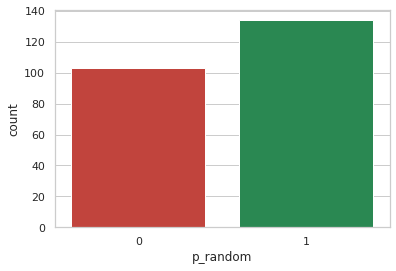

In [92]:
#predict logistic
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='p_random',data=df_results, palette= ['#d73027', '#1a9850'])

#Attempt five models

- Logistic Regression,
- MultinomialNB
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier

In [14]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [26]:
#lbl_actual = test.sentiment
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(X_train, y_train)
    lbl_pred = model.predict(X_test)
    a = (100*accuracy_score(lbl_pred, y_test))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, y_test))
    i +=1

LogisticRegression  Accuracy Score : 78.06%
              precision    recall  f1-score   support

           0       0.02      0.50      0.04         2
           1       0.99      0.78      0.88       235

    accuracy                           0.78       237
   macro avg       0.51      0.64      0.46       237
weighted avg       0.99      0.78      0.87       237

MultinomialNB  Accuracy Score : 78.06%
              precision    recall  f1-score   support

           0       0.02      0.50      0.04         2
           1       0.99      0.78      0.88       235

    accuracy                           0.78       237
   macro avg       0.51      0.64      0.46       237
weighted avg       0.99      0.78      0.87       237

DecisionTreeClassifier  Accuracy Score : 76.37%
              precision    recall  f1-score   support

           0       0.12      0.38      0.18        16
           1       0.95      0.79      0.86       221

    accuracy                           0.76       2

#After SMOTE

In [94]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

#best_clf = clf.fit(X_train_res, y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
#lbl_actual = test.sentiment
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(X_train_res, y_train_res)
    lbl_pred = model.predict(X_test)
    a = (100*accuracy_score(lbl_pred, y_test))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, y_test))
    i +=1

LogisticRegression  Accuracy Score : 48.1%
              precision    recall  f1-score   support

           0       0.56      0.22      0.32       129
           1       0.46      0.79      0.58       108

    accuracy                           0.48       237
   macro avg       0.51      0.51      0.45       237
weighted avg       0.51      0.48      0.44       237

MultinomialNB  Accuracy Score : 75.53%
              precision    recall  f1-score   support

           0       0.25      0.41      0.31        32
           1       0.90      0.81      0.85       205

    accuracy                           0.76       237
   macro avg       0.57      0.61      0.58       237
weighted avg       0.81      0.76      0.78       237

DecisionTreeClassifier  Accuracy Score : 51.05%
              precision    recall  f1-score   support

           0       0.65      0.26      0.37       132
           1       0.47      0.83      0.60       105

    accuracy                           0.51       23

The best model is MultinomialNB() since marco avarage of f1 score 58 with is the highest number

In [96]:
cl = MultinomialNB()
best_clf = cl.fit(X_train_res, y_train_res)

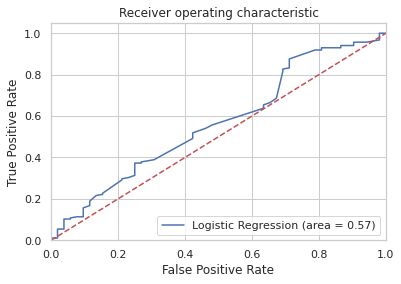

In [97]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()